In [1]:
import os
import pandas as pd
from pandasai import SmartDataframe
from pandasai import Agent
from pandasai.llm import BambooLLM

In [2]:
#DataFrame
df = pd.read_csv('kc_house_data.csv')

#API key
# llm = BambooLLM(api_key="$2a$10$MRAuSrmyjIQjPfqTm29ss.nQICo6GzgUKz1.TBp/gSmATcjtv6tz2")
# df = SmartDataframe(df, config={"llm": llm})
os.environ['PANDASAI_API_KEY'] = '$2a$10$MRAuSrmyjIQjPfqTm29ss.nQICo6GzgUKz1.TBp/gSmATcjtv6tz2'
pandas_ai = Agent(df)

In [3]:
request = """what is the mean price of all 5 bedroom houses for each distinct zipcode."""
response = pandas_ai.chat(request)
print(response)

                price
zipcode              
98001    3.185162e+05
98002    2.706000e+05
98003    4.281750e+05
98004    1.865356e+06
98005    8.801970e+05
...               ...
98177    9.538305e+05
98178    3.834772e+05
98188    3.487682e+05
98198    3.457176e+05
98199    1.211962e+06

[70 rows x 1 columns]


In [17]:
#train a regression model to predict price. use 70:30 train:test split. use the model to make predictions on the test sample. 
# then plot model predictions versus actuals

In [6]:
request = """generate python code to train a model to predict house prices. use 70 to 30 train test split,
and then predict prices for the test sample. training data is in kc_house_data.csv. if a data point has a missing value, 
remove it, and then create a plot using logarithmic axes to show predicted price vs actual price.
use random forest for the best results.
dont save as a file, and set s=1 in the scatterplot.
also overplot in red y=x where x ranges from 5*10^4 to 5*10^6 using a dashed line .
and include a legend in the plot."""
response = pandas_ai.generate_code(request)
print(response)

data = pd.read_csv('kc_house_data.csv')
data.dropna(inplace=True)
X = data.drop(['price', 'id', 'date'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=1)
plt.plot([50000.0, 5000000.0], [50000.0, 5000000.0], 'r--', label='y=x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()
result = {'type': 'plot', 'value': plt}


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

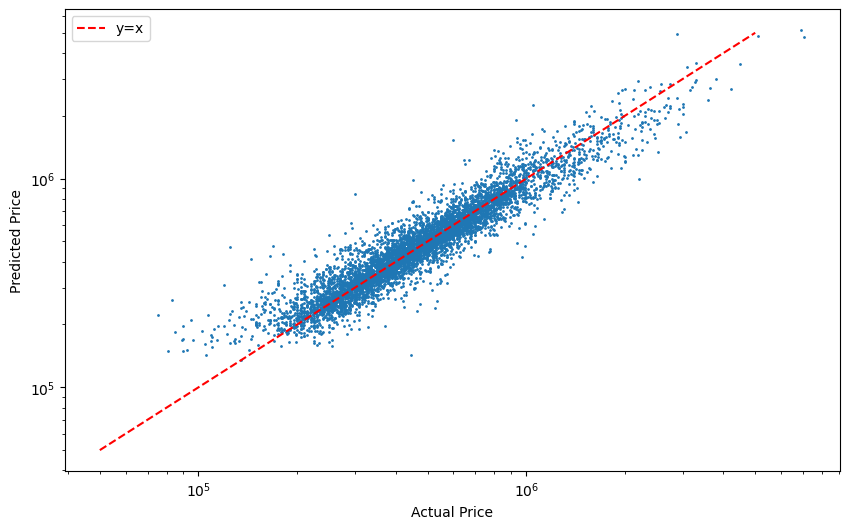

In [8]:
data = pd.read_csv('kc_house_data.csv')
data.dropna(inplace=True)
X = data.drop(['price', 'id', 'date'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=1)
plt.plot([50000.0, 5000000.0], [50000.0, 5000000.0], 'r--', label='y=x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()
result = {'type': 'plot', 'value': plt}
